<a href="https://colab.research.google.com/github/sandestiny/Social-Network-Adv---KNN/blob/main/Copy_of_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.shape

(400, 5)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [16]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [13]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# checking the shape of the datasets
print("Shape of X :", X.shape)
print('Shape of y :', y.shape)

Shape of X : (400, 2)
Shape of y : (400,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Shape of x_train : ", X_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (300, 2)
Shape of x_test :  (100, 2)
Shape of y_train :  (300,)
Shape of y_test :  (100,)


**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [20]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

**Predicting the Test set results**

In [21]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

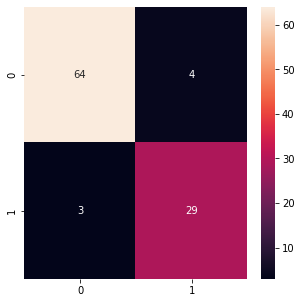

In [22]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5 , 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# getting the results
print(accuracies.mean())
print(accuracies.std())

0.9033333333333333
0.06574360974438671
